In [1]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py


In [2]:
plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [3]:
# create two test datasets

In [5]:
# common discharge drive
nsamp = 50000
fsamp=5000
sigamp=1
fdrive=3
offsetPhase=0#np.pi/2
tarr = np.arange(0, nsamp/fsamp, 1.0/fsamp)
sigIn = sigamp * np.sin(2.0 * np.pi * fdrive * tarr+offsetPhase)
sigNoShift=sigamp * np.sin(2.0 * np.pi * fdrive * tarr)

In [6]:
sigFiles=[]
justRandom=[]
for i in range(1000):
    randomNoise = np.random.randn(len(tarr))
    sigFiles.append(randomNoise+sigIn)
    justRandom.append(randomNoise)

(0.0, 1.0)

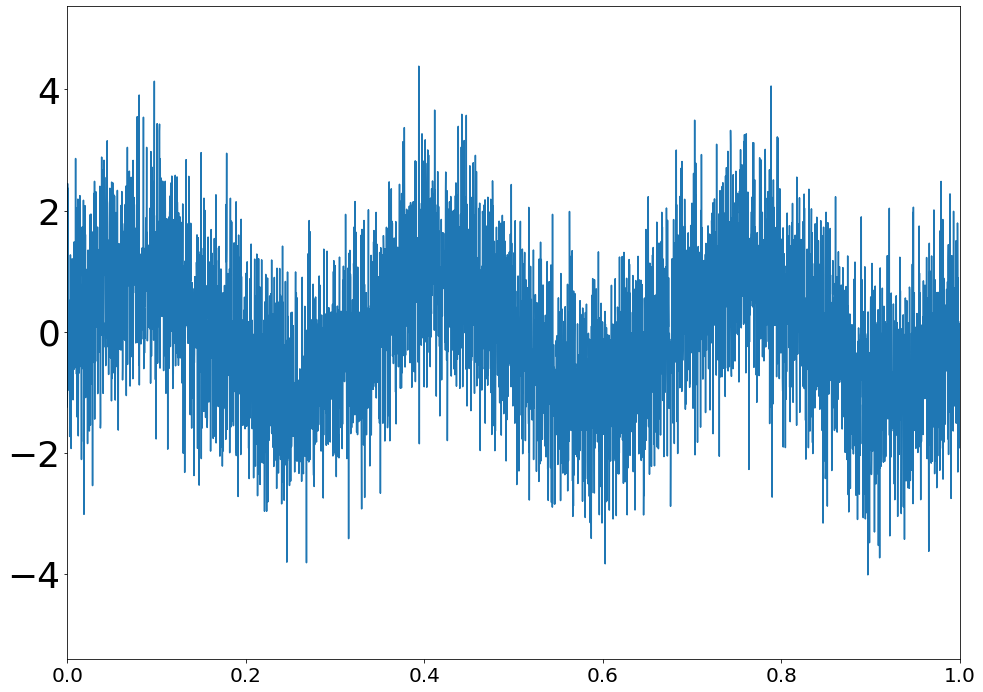

In [7]:
plt.plot(tarr,sigFiles[1])
plt.xlim(0,1)

In [12]:
def extract_correlation(sigIn,data=sigFiles,fDrive=3):
    maxC=[]
    argC=[]
    inPhaseC =[]
    for i in range(len(data)):
        c = 0
        c = correlation(sigIn,data,fsamp,fDrive)
        maxC.append(np.max(c))
        argC.append(np.argmax(c))
        inPhaseC.append(c[0])
    return maxC,argC,inPhaseC

In [13]:
c =extract_correlation(sigIn)

(array([   0.,    0.,    0.,    0.,    0., 1000.,    0.,    0.,    0.,
           0.]),
 array([0.50213587, 0.60213587, 0.70213587, 0.80213587, 0.90213587,
        1.00213587, 1.10213587, 1.20213587, 1.30213587, 1.40213587,
        1.50213587]),
 <BarContainer object of 10 artists>)

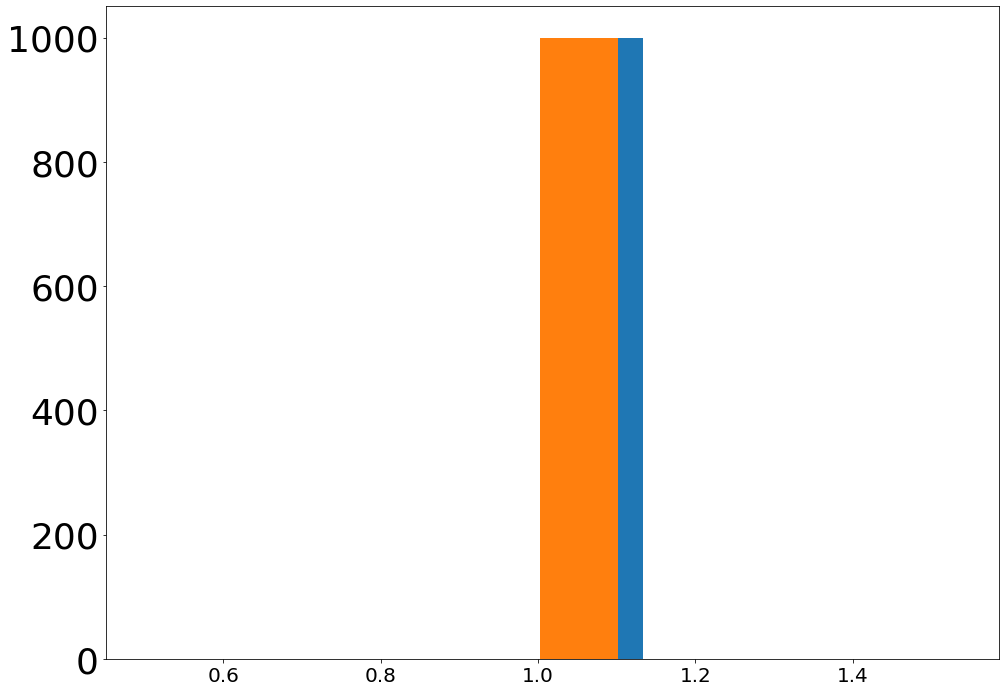

In [14]:
plt.hist(c[0])
plt.hist(c[2])

In [17]:
dd = digital_demod(sigFiles[0],3,band_width=2)

In [18]:
np.abs(dd)

array([0.98565451])

In [19]:
print(np.sqrt(np.real(dd)**2+np.imag(dd)**2))

[0.98565451]


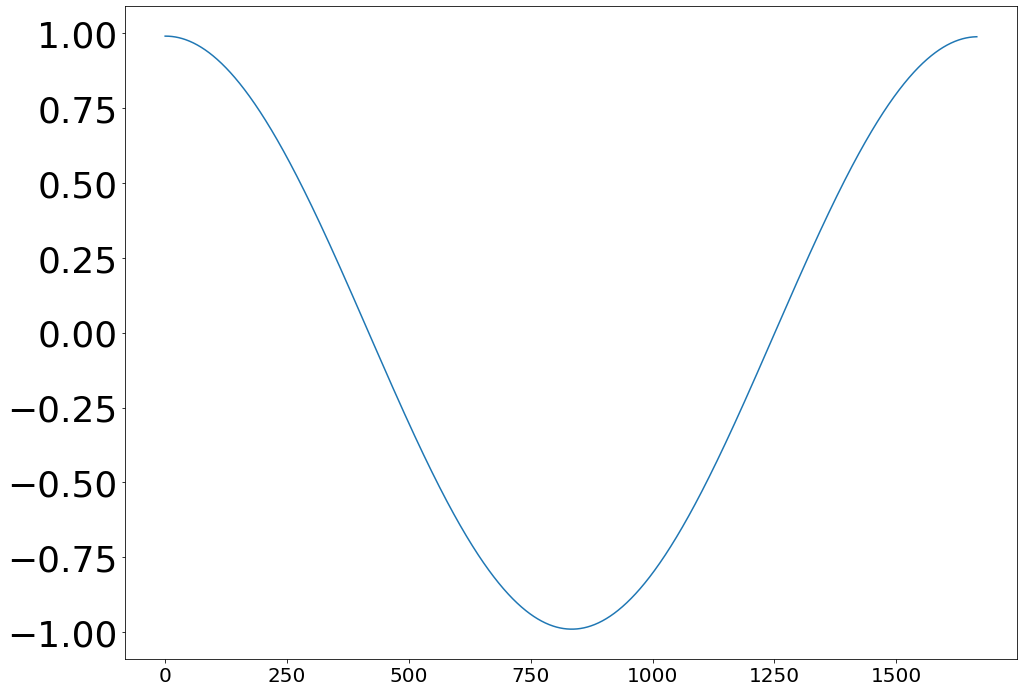

In [20]:
plt.plot(c/sigamp)

In [79]:
#method1
def data_to_amp_and_phase_single_axis(data,fsamp,res):
    data_det=signal.detrend(data)
    freqs=np.linspace(0,int(fsamp/2),(int(res/2))+1)    # change
    FFT=np.fft.rfft(data_det)
    norm = np.sqrt(2 / (res* fsamp))
    PSD = norm**2 * (FFT * FFT.conj()).real
    Phase =np.angle(FFT)
    return freqs,PSD,Phase
randomNoisePSD=0
sigandnoisePSD=0
for i in range(len(justRandom)):
    randomNoisePSD += data_to_amp_and_phase_single_axis(justRandom[i],5000,50000)[1]
    sigandnoisePSD +=data_to_amp_and_phase_single_axis(sigFiles[i],5000,50000)[1]

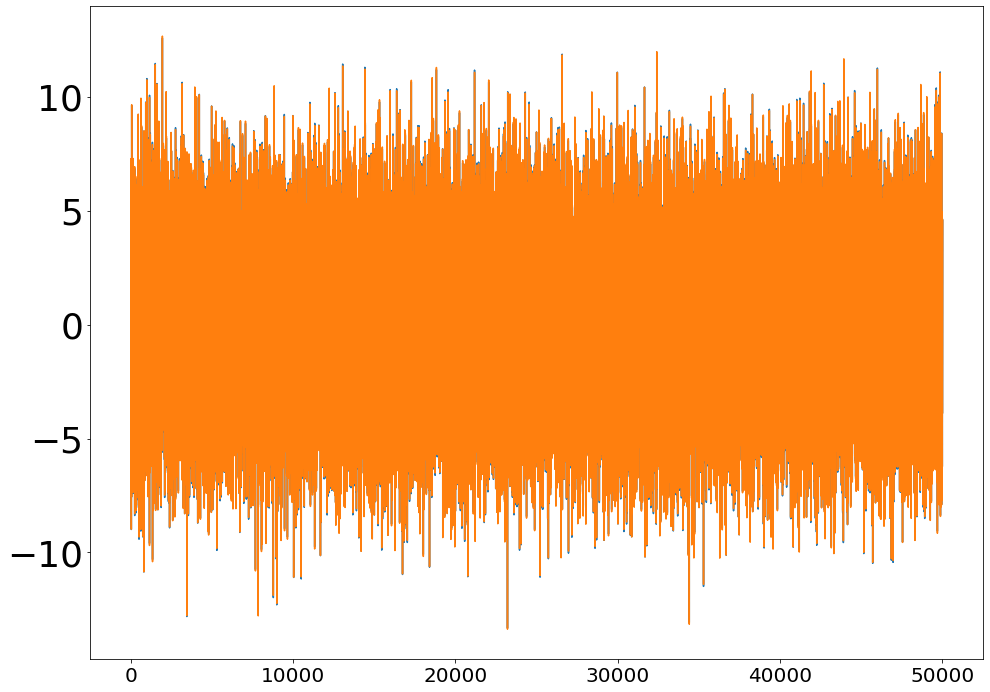

In [80]:
#method2#
plt.plot(np.sum(justRandom,axis=0))
plt.plot(np.sum(sigFiles,axis=0))

randomNoisePSD2= data_to_amp_and_phase_single_axis(np.sum(justRandom,axis=0),5000,50000)[1]
sigandnoisePSD2 = data_to_amp_and_phase_single_axis(np.sum(sigFiles,axis=0),5000,50000)[1]

(1e-06, 1)

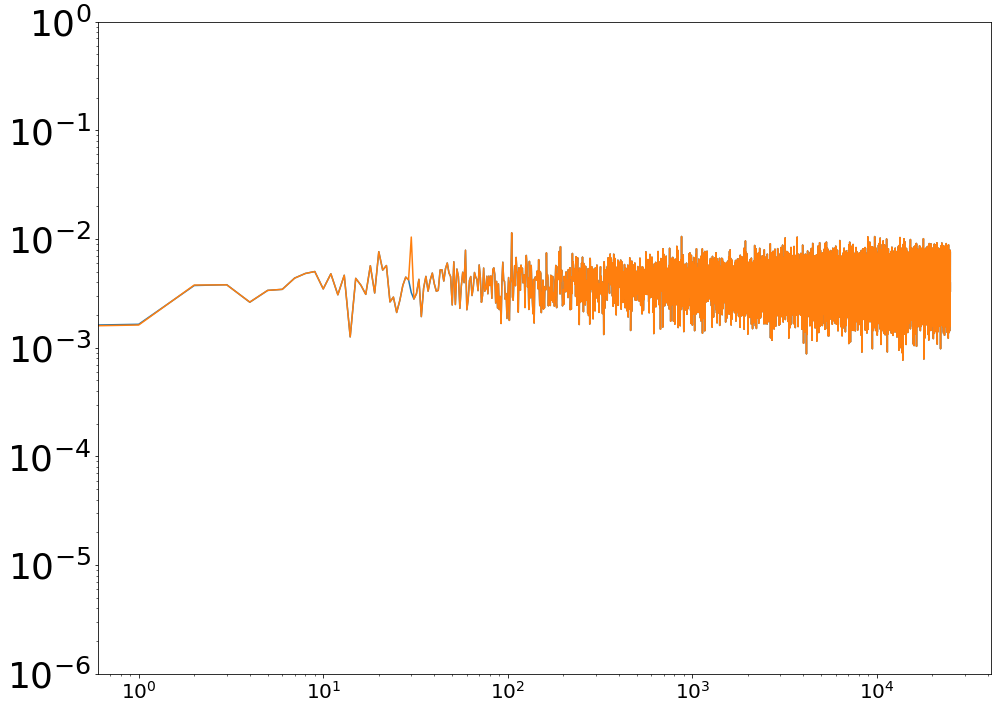

In [82]:
plt.loglog(randomNoisePSD)
plt.loglog(sigandnoisePSD)
#plt.loglog(randomNoisePSD2,alpha=0.5)
#plt.loglog(sigandnoisePSD2,alpha=0.5)
plt.ylim(1e-6,1)

(1e-06, 1)

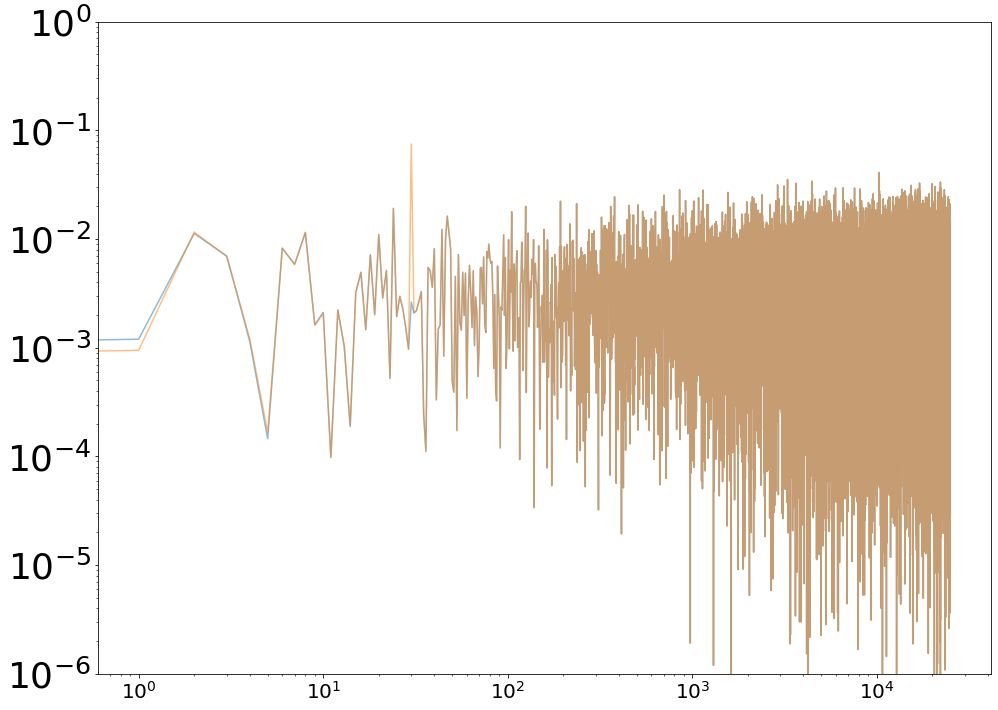

In [83]:
plt.loglog(randomNoisePSD2,alpha=0.5)
plt.loglog(sigandnoisePSD2,alpha=0.5)
plt.ylim(1e-6,1)

In [15]:
plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [18]:
folderName="/data/new_trap/20220617/Shaking/OscillationAerotech/"
filePrefix="Osci2"
f = load_dir(folderName,filePrefix)

100%|██████████| 6/6 [00:00<00:00, 100.49it/s]

6  files in folder
6  files loaded


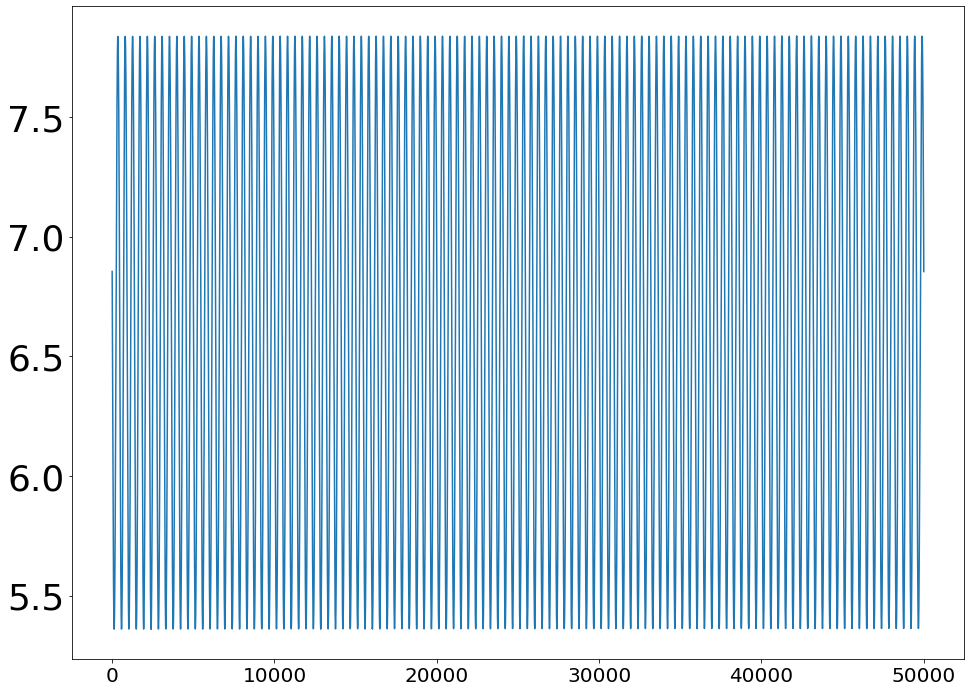

In [20]:
plt.plot(f[0].cant_pos[1])

In [21]:
def data_to_amp_and_phase_single_axis(data,fsamp,res):
    data_det=signal.detrend(data)
    freqs=np.linspace(0,int(fsamp/2),(int(res/2))+1)    # change
    FFT=np.fft.rfft(data_det)
    norm = np.sqrt(2 / (res* fsamp))
    PSD = norm**2 * (FFT * FFT.conj()).real
    Phase =np.angle(FFT)
    return PSD,Phase

## verification of the methods comparability to previously used mlab.psd

# fsamp=5000
# res=50000
# data=f[0].x2
# a = data_to_amp_and_phase_single_axis(data,fsamp,res)
# b = matplotlib.mlab.psd(signal.detrend(data), Fs = fsamp, NFFT = res, window = mlab.window_none)
# plt.loglog(a[0],a[1])
# plt.loglog(b[1],b[0],alpha=0.5)

In [23]:
a =data_to_amp_and_phase_single_axis(f[0].cant_pos[1],5000,50000)

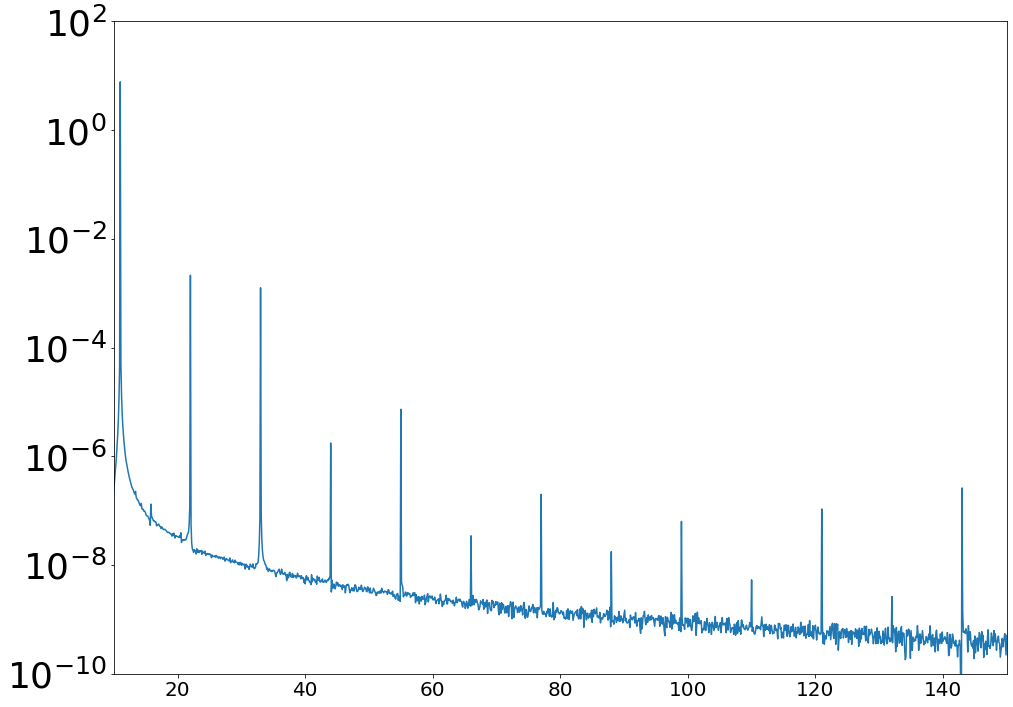

In [34]:
fsamp=5000
res=50000
freqs=np.linspace(0,int(fsamp/2),(int(res/2))+1)    # change

plt.plot(freqs,a[0])
plt.yscale("log")
plt.ylim(1e-10,100)
plt.xlim(10,150)
plt.show()

array([5.87722138e-29, 2.31132612e-04, 5.68983617e-05, ...,
       2.63842325e-11, 8.81315476e-12, 2.31722600e-14])